## 章節 1 - 如何零基礎入門深度學習

# <font color='LIGHTGREEN'>單元6 學會深度學習的關鍵流程</font>

![開車圖片](https://images.pexels.com/photos/376729/pexels-photo-376729.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=150)

圖片連結:https://www.pexels.com/

## 學習大綱:
### 1-2-1.深度學習工具
### 1-2-2.深度學習的SOP關鍵流程


## 1-2-1.深度學習工具 

### 深度學習的大神 AlphaGo Zero就是使用`TensorFlow`訓練，最初時`除了規則`，對圍棋一無所知。應用AI進行「非監督式學習」，自己和自己對弈，直到能`預測`自己的`每一手棋`，對`棋局結果`的影響，最後靠`自學`打敗人類棋王(維基百科)

### 匯入tensorflow模組

In [0]:
#1601 import匯入 tensorflow as成為 tf(可以自訂,慣用tf)
#一個開源軟體庫，Google大腦的第二代
#機器學習系統，由Tensor（張量）與Flow（流）兩部分組成
try:
    %tensorflow_version 2.x #1203 指定使用tensorflow 2.x
except Exception:
    pass
import tensorflow as tf # tf 1.X升級為2.X

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #1203 指定使用tensorflow 2.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


### 顯示TensorFlow版本

In [0]:
#1602 顯示TensorFlow版本
print(tf.__version__)

2.1.0


## 1-2-2. 深度學習的SOP關鍵流程  🍖 ↔ 🐶 ↔ 🏠


### 1.   載入數據 / 數據 / 餵🍖
### 2.   訓練建模 / 訓練 / 養🐶
### 3.   預測未知 / 預測 / 用🏠




### 開源數據集入門: 手寫數字(MNIST dataset)

![MNIST數據集](https://cdn.lowgif.com/full/b7823837ff72b694-unsupervised-deep-learning-with-autoencoders-on-the-mnist.gif)

### SOP步驟1.載入數據 / 數據 / 餵  🍖 🍌 ↔ 🐶 ↔ 🏠

In [0]:
#1604 載入數據集_手寫數字(MNIST dataset) #### SOP-1
import tensorflow as tf 
mnist = tf.keras.datasets.mnist # 載入數據
# 數據集的組成(x_train:訓練用data, y_train:訓練用label), (x_test:測試用data, y_test:測試用label)   
(x_train, y_train) ,  (x_test, y_test) = mnist.load_data() 
# 數據預處理,將data轉成0~1的小數(歸一化)
x_train, x_test = x_train / 255.0, X_test / 255.0

In [0]:
#1605 確認載入數據
print('訓練用圖片數量',len(x_train)) #training data 總共有60000張圖片
print('測試用圖片數量',len(x_test)) #test data 總共有10000張圖片
print('每張圖片解析度',x_train[0].shape) #每張圖片（0第一張）大小為 28x28 pixel

訓練用圖片數量 60000
測試用圖片數量 10000
每張圖片解析度 (28, 28)


### SOP步驟2.建模訓練  / 訓練 / 養 🍖 ↔ 🐶 🙉  ↔ 🏠
採用序列模型Sequential 輸入為28x28 中間層 整流線性單元 輸出層 歸一化

In [0]:
#1606 建模訓練(training model) ###　SOP-2 
# %% jupyter魔法函數 time計時器
%%time #計時器
# 建立模型
model = tf.keras.models.Sequential([                
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])
# 編譯模型 compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
# 訓練模型 training
model.fit(x_train, y_train, epochs=20) #epochs=訓練回合數
# 儲存模型
model.save('Mnist_5.h5')

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2974 - accuracy: 0.9143
Epoch 2/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1435 - accuracy: 0.9583
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1085 - accuracy: 0.9676
Epoch 4/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0881 - accuracy: 0.9729
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0757 - accuracy: 0.9761
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0656 - accuracy: 0.9791
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0596 - accuracy: 0.9811
Epoch 8/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0545 - accuracy: 0.9820
Epoch 9/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0483 - accuracy: 0.9837
Epoch 10/20
60

### SOP步驟3.預測未知 / 預測 / 用 🍖 ↔ 🐶  ↔ 🏠 🐀

### 模型的準確率如何?

In [0]:
#1607 評估模型
model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0825 - accuracy: 0.9812


[0.08249083320605351, 0.9812]

### 執行預測與顯示圖片

模型預測數字= 4 正確答案(label)= 4


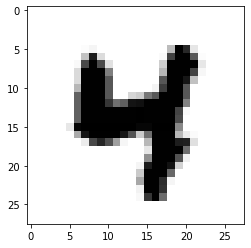

In [0]:
#1608 執行預測
from matplotlib.pyplot import imshow
prediction = model.predict_classes(x_test) #針對測試集進行預測分類
test = 85
print('模型預測數字=',prediction[test],'正確答案(label)=',y_test[test])
imshow(x_test[test], cmap='gray_r')

### 練習題1:預測不同的測試集圖片



模型預測數字= 2 正確答案(label)= 4


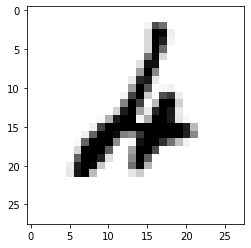

In [0]:
#1209 試試149 151 247 321 340 381
from matplotlib.pyplot import imshow
prediction = model.predict_classes(x_test) #針對測試集進行預測分類
test = 247
print('模型預測數字=',prediction[test],'正確答案(label)=',y_test[test])
imshow(x_test[test], cmap='gray_r')

### 練習題2: 數據集探索
顯示訓練集第1000-1009筆圖形

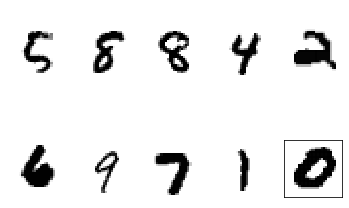

In [0]:
#1210 本練習僅適用一次顯示10個圖,起始為10的倍數
import matplotlib.pyplot as plt
i=0
for i in range(2000,2009+1): #(起始,結束+1)
    x= i % 10 # 求餘數 x=0~9 顯示圖片位置序號
    plt.axis('off') #顯示xy軸 on/off
    ax=plt.subplot(2,5,x+1) #一次顯示多圖 (列,行,圖片位置序號 1開始)
    ax.imshow(x_train[i], cmap='gray_r') #colormap:None(預設), binary(二值化/非黑即白), gray_r, rainbow, seismic, summer
    title = str(i)+",l=" + str(y_train[i]) #圖片增加文字說明(序號,標籤)
    ax.set_title(title, fontsize=10,color='white')  #顯示(文字說明,字型大小,顏色)
    ax.set_xticks([]); ax.set_yticks([]) #不顯示xy軸刻度

### 練習題3: 數據集探索2
顯示"測試集"第0-9筆圖形

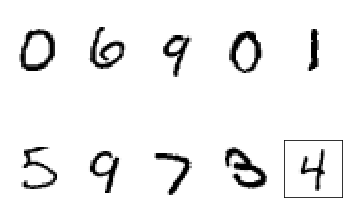

In [0]:
#1211 本練習僅適用一次顯示10個圖,起始為10的倍數
i=0
for i in range(10,19+1): #(起始,結束+1)
    x= i % 10 # 求餘數 x=0~9 顯示圖片位置序號
    plt.axis('off') #顯示xy軸 on/off
    ax=plt.subplot(2,5,x+1) #一次顯示多圖 (列,行,圖片位置序號 1開始)
    ax.imshow(x_test[i], cmap='binary') #colormap:None(預設), binary(二值化/非黑即白), gray_r, rainbow, seismic, summer
    title = str(i)+",l=" + str(y_test[i]) #圖片增加文字說明(序號,標籤)
    ax.set_title(title, fontsize=10,color='white')  #顯示(文字說明,字型大小,顏色)
    ax.set_xticks([]); ax.set_yticks([]) #不顯示xy軸刻度

## Homework: 依照SOP的三步驟
### 自己操作一次`深度學習`，使用`MNIST數據集`辨識手寫數字

In [0]:
#1212 SOP-1 數據


In [0]:
#1213 SOP-2 模型


In [0]:
#1214 SOP-3 預測


## 1-6.總結
### 天下雜誌: AI時代 人才的挑戰是沒有問題、不會問問題，同學是否有帶著問題來上課呢?

### Q1.深度學習SOP是什麼? 試著使用白話來舉例
### Q2.請實際操作手寫辨識範例，有遇到問題嗎?
### Q3.說說看? 數據集包含哪些必要組成呢?


# NEXT: 作業1-數據視覺化圖表製作練習